In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("test_cluster.csv", encoding="cp1251", sep=";")

In [5]:
df = pd.DataFrame(data)
df.head(15)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.0,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.0,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.0,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.0,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515


Возрастные группы:

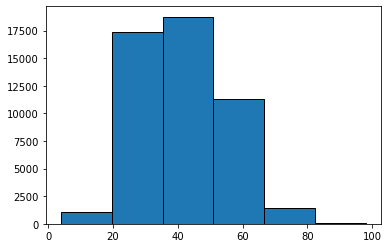

In [6]:
ages = df["age"]
ages_hist = plt.hist(ages, bins=6, edgecolor="black")
plt.show()

Отношение мужчин к женщинам:

<AxesSubplot:>

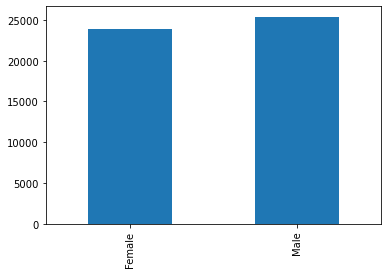

In [7]:
women_ages = df[(df["gender"] == "F")]["age"]
men_ages = df[(df["gender"] == "М")]["age"]
relation = pd.Series([len(women_ages), len(men_ages)], index=["Female", "Male"])
relation.plot(kind="bar")

Средня сумма затрат в зависимости от города

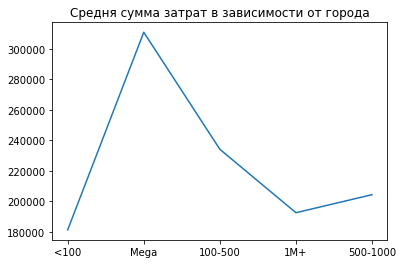

In [9]:
city_types = df["city_type"].unique()
average_spendings = list()
for city_type in city_types:
    avg = df[ (df["city_type"] == city_type)]["dc_trx_sum"].mean()
    average_spendings.append(avg)

average_spendings = [np.floor(avg) for avg in average_spendings]

plt.plot(city_types, average_spendings)
plt.title("Средня сумма затрат в зависимости от города")
plt.show()

In [10]:
df.loc[df["ml_balance"] == 0, "ml_balance"] = False
df.loc[df["ml_balance"] != 0, "ml_balance"] = True
subdf = df[["ml_balance", "income"]]
subdf = subdf.loc[df["income"] != 0]

In [ ]:
sns.catplot(x="ml_balance",
            y="income",
            kind="swarm",
            aspect=2,
            data=subdf);
# "strip", "swarm", "box", "violin",
#     "boxen", "point", "bar", or "count"